> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate IMDB Movies Data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.
<p>my data set is about movies across some years <br>
    and another dataset is  about credits data  and i will go through both of them <br>
    and merge them to answer some questions about movies and their rvenues</p>
<h6>Question 1:Which genres are most popular from year to year?</h6>
<h6>Question 2:What kinds of properties are associated with movies that have high revenues?</h6>


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties


### First, I will load credits data and go through it 

In [2]:
#load credits data and see first five rows
credits=pd.read_csv("tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
#the shape of credits_data
credits.shape

(4803, 4)

In [4]:
#finding the data types of columns
#see if there is any null value
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
#see if there is any duplicated data
credits.duplicated().value_counts()

False    4803
dtype: int64

<h3> A little overview of credits_data</h3>
<p>After looking on the data in the important columns which are <br>
    ["cast","crew"] they are in json object <br>
    so we need to load them to understand their data</p>

<h4>go through json objects in credits_data</h4>

In [6]:
#the first json object in "cast" column
cast=json.loads(credits['cast'][0])
cast[0]

{'cast_id': 242,
 'character': 'Jake Sully',
 'credit_id': '5602a8a7c3a3685532001c9a',
 'gender': 2,
 'id': 65731,
 'name': 'Sam Worthington',
 'order': 0}

In [7]:
#the first json object in "crew" column
crew=json.loads(credits['crew'][0])
crew[0]

{'credit_id': '52fe48009251416c750aca23',
 'department': 'Editing',
 'gender': 0,
 'id': 1721,
 'job': 'Editor',
 'name': 'Stephen E. Rivkin'}

<h3>Decision on json obects in ["cast","crew"] in credits_data</h3>
<p>after seeing those json object,I decided to ignore the crew data<br>
    and use the json objects in cast column to get the gender of the cast</p>

### second I will load movies data and go through it 

In [8]:
#load movies data and see first five rows
df_m=pd.read_csv("tmdb_5000_movies.csv")
df_m.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
#the shape of credits_data
df_m.shape

(4803, 20)

In [10]:
#finding the data types of columns
#see if there is any null value
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [11]:
#see if there is any duplicated data
df_m.duplicated().value_counts()

False    4803
dtype: int64

In [12]:
#see some statistics about movies data
df_m.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<h3> A little overview of movies_data</h3>
<p>After looking on the data in the data 
    there seems to be a lot of json object<br> columns we need to look inside them to know more<br> 
    there are also columns which contains null value we have to decide about <br>
    what to do with them , and there are data which equals to zero we have to decide about them <br>
    whether we remove them ,keep them or replace them with another value<br>
    in addition there are data types we need to look through them like "release_date"</p>

<h4>go through json objects in movies_data</h4>

In [13]:
#number of unique values in json objects in "genres" column 
df_m['genres'].nunique()

1175

In [14]:
#the first json object in "genres" column
genre=json.loads(df_m['genres'][0])
genre

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [15]:
#number of unique values in json objects in "keywords" column
df_m['keywords'].nunique()

4222

In [16]:
#the first json object in "keywords" column
keyword=json.loads(df_m['keywords'][0])
keyword

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [17]:
#number of unique values in json objects in "production_companies" column
df_m['production_companies'].nunique()

3697

In [18]:
#the first json object in "production_companies" column
prod_companies=json.loads(df_m['production_companies'][0])
prod_companies

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [19]:
#number of unique values in json objects in "production_countries" column
df_m['production_countries'].nunique()

469

In [20]:
#the first json object in "production_countries" column
prod_countries=json.loads(df_m['production_countries'][0])
prod_countries

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [21]:
#number of unique values in json objects in "spoken_languages" column
df_m['spoken_languages'].nunique()

544

In [22]:
#the first json object in "spoken_languages" column
spoke_languages=json.loads(df_m['spoken_languages'][0])
spoke_languages

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

<h4>go through the other columns as json columns </h4> 

In [23]:
#the number of repeatation of a value in "budget" column
df_m['budget'].value_counts()

0            1037
20000000      144
30000000      128
25000000      126
40000000      123
             ... 
280000000       1
2053648         1
85000           1
52500000        1
40600000        1
Name: budget, Length: 436, dtype: int64

In [24]:
#the number of repeatation of a value in "revenue" column
df_m['revenue'].value_counts()

0           1427
7000000        6
8000000        6
6000000        5
12000000       5
            ... 
32726956       1
4420000        1
26096852       1
79817939       1
10680275       1
Name: revenue, Length: 3297, dtype: int64

In [25]:
#the number of repeatation of a value in "title" column
df_m['title'].value_counts()

The Host                  2
Out of the Blue           2
Batman                    2
Growing Up Smith          1
Step Up 2: The Streets    1
                         ..
My Bloody Valentine       1
The Truman Show           1
The Alamo                 1
Brazil                    1
Machine Gun McCain        1
Name: title, Length: 4800, dtype: int64

In [26]:
#see the movies with title is "The Host" and assess them 
df_m.query('title=="The Host"')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537


In [27]:
#see the movies with title is "Batman" and assess them 
df_m.query('title=="Batman"')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [28]:
#see the movies with title is "Out of the Blue" and assess them 
df_m.query('title=="Out of the Blue"')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18


In [29]:
#the number of repeatation of a value in "original_title" column
df_m['original_title'].value_counts()

Out of the Blue                    2
Batman                             2
Rockaway                           1
Ishtar                             1
Darkness Falls                     1
                                  ..
Confessions of a Dangerous Mind    1
August: Osage County               1
The Big Wedding                    1
Heavenly Creatures                 1
黃石的孩子                              1
Name: original_title, Length: 4801, dtype: int64

<p>It looks like "title" column is mostly the same as "original_title" column</p> 

In [30]:
#the number of repeatation of a value in "status" column
df_m['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [31]:
#go through the other value of "status" column
df_m.query('status in ["Rumored","Post Production"]')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2906,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",https://www.facebook.com/eastsidestorymovie,357837,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 271, ""...",cs,Dancin' It's On,"This coming of age Dance Film, in the spirit o...",0.186234,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,Dancin' Like You've Never Seen Before,Dancin' It's On,4.3,2
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],[],2015-04-24,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Brotherly Love,6.9,21
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-08-26,841733,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Higher Ground,5.3,14
4401,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,43630,[],en,The Helix... Loaded,,0.020600,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-01,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,The Helix... Loaded,4.8,2
4453,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,57294,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...",en,Crying with Laughter,Powerfully redemptive and darkly comedic reven...,0.108135,"[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-06-01,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,A Bad Trip Down Memory Lane,Crying with Laughter,7.0,1
4508,56000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.facebook.com/theharvestfilm,70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,0.010909,[],[],2011-07-29,0,80.0,[],Rumored,NaN,The Harvest (La Cosecha),0.0,0
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1
4754,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,84659,[],en,The Naked Ape,The Naked Ape is a coming-of-age film followin...,0.077577,[],[],2006-09-16,0,110.0,[],Rumored,NaN,The Naked Ape,5.0,1


In [32]:
#the number of repeatation of a value in "vote_average" column
df_m['vote_average'].value_counts()

6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
2.2      1
9.5      1
2.6      1
1.9      1
Name: vote_average, Length: 71, dtype: int64

In [33]:
#the number of repeatation of a value in "vote_count" column
df_m['vote_count'].value_counts()

0       62
1       53
2       46
4       43
3       41
        ..
2295     1
266      1
2359     1
314      1
2039     1
Name: vote_count, Length: 1609, dtype: int64

In [34]:
#the number of unique values in "vote_count" column 
df_m['vote_count'].nunique()

1609

In [35]:
#the number of repeatation of a value in "original_language" column
df_m['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ro       2
ar       2
id       2
ta       2
cs       2
pl       1
nb       1
sl       1
tr       1
el       1
ps       1
te       1
af       1
vi       1
ky       1
hu       1
xx       1
no       1
is       1
Name: original_language, dtype: int64

In [36]:
#see the "original _language for the movie with the max Revenue"
max_revenue=df_m["revenue"].max()
df_m.query('revenue==@max_revenue')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

### first clean credits_data :- 

<h3>what are we going to do: </h3>
<p>first, we are going to drop the crew column as we decided we will not use itand also "Title" we donot need it<br>
second, we are going to go through cast column and get the number of each gender in a movie<br>
third, we are going to drop the cast column after we used it<br>
finally, we will merge the two data sets to be ready for the ovrall cleaning</p>

In [37]:
#copy credits_data in another dataframe so we can go back if needed
cred=credits.copy()

In [38]:
# drop crew column
cred.drop(['crew','title'],axis=1,inplace=True)

In [39]:
#geting the number of each gender step 
#identify lists for it
num_cast=[]   #the number of all cast
female=[]     #the number of female cast
male=[]       #the number of male cast
unknown=[]    #the number of unknown gender cast


In [40]:
cred.columns

Index(['movie_id', 'cast'], dtype='object')

In [41]:
#append the values to the lists from json objects 
for i in range(credits.shape[0]):
    cast=json.loads(cred['cast'][i])
    n_c,f,m,u=0,0,0,0
    for c in range(len(cast)):
        n_c+=1
        if cast[c]['gender']== 1:
            f+=1
        elif cast[c]['gender']==2:
            m+=1
        else:
            u+=1
    num_cast.append(n_c)
    female.append(f)
    male.append(m)
    unknown.append(u)

In [42]:
#adding them to the copy dataframe
columns = ['num_of_cast','female', 'male', 'unknown_gen']
cred[columns[0]]=num_cast
cred[columns[1]]=female
cred[columns[2]]=male
cred[columns[3]]=unknown
cred.head(1)

,movie_id,cast,num_of_cast,female,male,unknown_gen
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",83,12,20,51


In [43]:
#drop the cast column now 
cred.drop(['cast'],axis=1,inplace=True)

In [44]:
cred.head(1)

,movie_id,num_of_cast,female,male,unknown_gen
0,19995,83,12,20,51


In [45]:
#finally merge it with movies data in df_combined dataframe
df_combined = df_m.merge(cred, left_on='id', right_on='movie_id', how='inner')

In [46]:
df_combined.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,num_of_cast,female,male,unknown_gen
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,83,12,20,51
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,34,5,25,4


<h5>see some information about combined dataframe before we start cleaning it</h5>

In [47]:
df_combined.shape

(4803, 25)

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 25 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [49]:
df_combined.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,num_of_cast,female,male,unknown_gen
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281,22.123048,5.031855,10.054341,7.036852
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033,19.582493,5.368746,7.942877,11.176134
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000,11.000000,2.000000,5.000000,1.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000,16.000000,4.000000,8.000000,4.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000,25.000000,6.000000,13.000000,8.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000,224.000000,107.000000,88.000000,164.000000


<h3>what are we going to do to clean it:</h3>
<p>first, we have to drop the unuseful columns["Title","id","movie_id","overview","hompage"]<br>
    second, we have to solve the json objects columns and get useful information and then drop them<br>
    third, we have to solve the null value in columns<br>
    fourth, convert to the appropirate data types for columns</p>

In [50]:
#copy dataframe to another so we can we go back if needed
movie=df_combined.copy()
movie.shape

(4803, 25)

In [51]:
movie.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,num_of_cast,female,male,unknown_gen
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,83,12,20,51


In [52]:
#drop unusfull columns
movie.drop(["title","id","movie_id","overview","homepage"],axis=1,inplace=True)
movie.shape

(4803, 20)

<h4>go through json objects columns </h4>
 <h6>get the number of keywords for each movie from json objects in keywords column</h6>

In [53]:
#getting the num of key words
num_key=[]
for i in range(movie.shape[0]):
    keyword=json.loads(movie['keywords'][i])
    num_key.append(len(keyword))

In [54]:
#adding them to dataframe
movie['num_keywords']=num_key

In [55]:
#assuring it was added
movie.columns[-1]

'num_keywords'

<h6>get the number of spoken languages from json objects in spoken_languages column</h6>

In [56]:
#getting the num of spoken languages
spoken_language=[]
for i in range(movie.shape[0]):
    languages=json.loads(movie['spoken_languages'][i])
    spoken_language.append(len(languages))

In [57]:
#add them to dataframe
movie['num_spoken_lang']=spoken_language

In [58]:
#assuring it was added
movie.columns[-1]

'num_spoken_lang'

<h6>get the number of production countries from json objects in production_countries column</h6>

In [59]:
#getting the num of production countries
num_prod_con=[]
for i in range(movie.shape[0]):
    con=json.loads(movie['production_countries'][i])
    num_prod_con.append(len(con))

In [60]:
#add them to dataframe
movie['num_prod_con']=num_prod_con

In [61]:
#assuring it was added
movie.columns[-1]

'num_prod_con'

<h6>get the number of production companies from json objects in production_companies column</h6>

In [62]:
#getting the num of production companies
num_prod_comp=[]
for i in range(movie.shape[0]):
    comp=json.loads(movie['production_companies'][i])
    num_prod_comp.append(len(comp))

In [63]:
#add them to dataframe
movie['num_prod_comp']=num_prod_comp

In [64]:
#assuring it was added
movie.columns[-1]

'num_prod_comp'

<h6>get the list of genres in json objects in genres column</h6>

In [65]:
#getting the list of genres of each movie
genres=[]
for i in range(movie.shape[0]):
    gen=json.loads(movie['genres'][i])
    gen_list=[gen[i]['name'] for i in range(len(gen))]
    genres.append(gen_list)

In [66]:
# add it to the dataframe
movie["genre_list"]=genres

In [67]:
# assuring it was added
movie.columns[-1]

'genre_list'

<h4>now, drop the json objects columns</h4>

In [68]:
#the shape before dropping
movie.shape

(4803, 25)

In [69]:
#drop the columns
movie.drop(['genres','production_companies','production_countries','keywords','spoken_languages'],axis=1,inplace=True)

In [70]:
#the shape after dropping
movie.shape

(4803, 20)

<h3> now , we solve the null values in columns</h3>

In [71]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget               4803 non-null int64
original_language    4803 non-null object
original_title       4803 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
status               4803 non-null object
tagline              3959 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
num_of_cast          4803 non-null int64
female               4803 non-null int64
male                 4803 non-null int64
unknown_gen          4803 non-null int64
num_keywords         4803 non-null int64
num_spoken_lang      4803 non-null int64
num_prod_con         4803 non-null int64
num_prod_comp        4803 non-null int64
genre_list           4803 non-null object
dtypes: float64(3), int64(11), object(6)
memory usage: 948.0+

<h6> solve the runtime column null values</h6>

In [72]:
#see what the other data for null runtime value look like 
df_m[df_m["runtime"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


<p> after seeing what they look like , i think it will not hinder any thing if we drop them <br>
    as the most important column "revenue" in both of them equales zero</p>

In [75]:
#indexs of null value
indexes_run=movie[movie["runtime"].isnull()].index

In [76]:
#drop the row with runtime null value in it 
movie.drop(indexes_run,axis=0,inplace=True)

In [77]:
# info after dropping
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 20 columns):
budget               4801 non-null int64
original_language    4801 non-null object
original_title       4801 non-null object
popularity           4801 non-null float64
release_date         4800 non-null object
revenue              4801 non-null int64
runtime              4801 non-null float64
status               4801 non-null object
tagline              3959 non-null object
vote_average         4801 non-null float64
vote_count           4801 non-null int64
num_of_cast          4801 non-null int64
female               4801 non-null int64
male                 4801 non-null int64
unknown_gen          4801 non-null int64
num_keywords         4801 non-null int64
num_spoken_lang      4801 non-null int64
num_prod_con         4801 non-null int64
num_prod_comp        4801 non-null int64
genre_list           4801 non-null object
dtypes: float64(3), int64(11), object(6)
memory usage: 787.7+

<h4>solve the release_date null values</h4>

In [78]:
#see what the other data for null runtime value look like 
df_m[df_m["release_date"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


<p> after seeing what they look like , i think  also it will not hinder any thing as well as runtime <br>
    as the most important column "revenue" in both of them equales zero</p>

In [80]:
#indexs of null value
indexes_date=movie[movie["release_date"].isnull()].index

In [81]:
#drop the row with release_date null value in it 
movie.drop(indexes_date,axis=0,inplace=True)

In [82]:
# info after dropping
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 20 columns):
budget               4800 non-null int64
original_language    4800 non-null object
original_title       4800 non-null object
popularity           4800 non-null float64
release_date         4800 non-null object
revenue              4800 non-null int64
runtime              4800 non-null float64
status               4800 non-null object
tagline              3959 non-null object
vote_average         4800 non-null float64
vote_count           4800 non-null int64
num_of_cast          4800 non-null int64
female               4800 non-null int64
male                 4800 non-null int64
unknown_gen          4800 non-null int64
num_keywords         4800 non-null int64
num_spoken_lang      4800 non-null int64
num_prod_con         4800 non-null int64
num_prod_comp        4800 non-null int64
genre_list           4800 non-null object
dtypes: float64(3), int64(11), object(6)
memory usage: 787.5+

<h4>last of null values in tagline column</h4>
<p> so i decided to get the number of words in every tag line<br> and fill the null value with the mean of it</p> 

In [83]:
#getting the num of words in tagline 
movie['num_tag_words']=movie['tagline'].str.count(" ")+1

In [84]:
#fill the null values with the mean of num of words
mean_tag_word=int(movie['num_tag_words'].mean())
movie['num_tag_words'].fillna(mean_tag_word,inplace=True)

In [85]:
#drop the tagline column 
movie.drop(['tagline'],axis=1,inplace=True)

In [86]:
# info after dropping
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 20 columns):
budget               4800 non-null int64
original_language    4800 non-null object
original_title       4800 non-null object
popularity           4800 non-null float64
release_date         4800 non-null object
revenue              4800 non-null int64
runtime              4800 non-null float64
status               4800 non-null object
vote_average         4800 non-null float64
vote_count           4800 non-null int64
num_of_cast          4800 non-null int64
female               4800 non-null int64
male                 4800 non-null int64
unknown_gen          4800 non-null int64
num_keywords         4800 non-null int64
num_spoken_lang      4800 non-null int64
num_prod_con         4800 non-null int64
num_prod_comp        4800 non-null int64
genre_list           4800 non-null object
num_tag_words        4800 non-null float64
dtypes: float64(4), int64(11), object(5)
memory usage: 787.5

<h6>solve some values in status column</h6>

In [87]:
#the number of repeatation of a value in "status" column
df_m['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

<p>as you see above there are 8 values of status of movies which is un wanted<br>
as it is describe that the movie is not released so we better drop them </p>

In [89]:
#the index of unwanted values
row_status=movie.query('status in ["Rumored","Post Production"]').index

In [90]:
#drop them
movie.drop(row_status,axis=0,inplace=True)

<p>now we released that the status column has only released value <br>so it un usefull column ,we better drop it</p>

In [91]:
#drop the status column
movie.drop(['status'],axis=1,inplace=True)

In [92]:
#we see the info after dropping
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4802
Data columns (total 19 columns):
budget               4792 non-null int64
original_language    4792 non-null object
original_title       4792 non-null object
popularity           4792 non-null float64
release_date         4792 non-null object
revenue              4792 non-null int64
runtime              4792 non-null float64
vote_average         4792 non-null float64
vote_count           4792 non-null int64
num_of_cast          4792 non-null int64
female               4792 non-null int64
male                 4792 non-null int64
unknown_gen          4792 non-null int64
num_keywords         4792 non-null int64
num_spoken_lang      4792 non-null int64
num_prod_con         4792 non-null int64
num_prod_comp        4792 non-null int64
genre_list           4792 non-null object
num_tag_words        4792 non-null float64
dtypes: float64(4), int64(11), object(4)
memory usage: 748.8+ KB


<h4>convert to appropirate data types</h4> 

In [105]:
#change data type of release_date to date_time
movie['release_date']=pd.to_datetime(movie['release_date'])

In [106]:
#extract the year only from date
# add it to dataframe
movie['year']=movie['release_date'].dt.year

In [107]:
#drop release_date
movie.drop(['release_date'],axis=1,inplace=True)

In [108]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4802
Data columns (total 19 columns):
budget               4792 non-null int64
original_language    4792 non-null object
original_title       4792 non-null object
popularity           4792 non-null float64
revenue              4792 non-null int64
runtime              4792 non-null float64
vote_average         4792 non-null float64
vote_count           4792 non-null int64
num_of_cast          4792 non-null int64
female               4792 non-null int64
male                 4792 non-null int64
unknown_gen          4792 non-null int64
num_keywords         4792 non-null int64
num_spoken_lang      4792 non-null int64
num_prod_con         4792 non-null int64
num_prod_comp        4792 non-null int64
genre_list           4792 non-null object
num_tag_words        4792 non-null float64
year                 4792 non-null int64
dtypes: float64(4), int64(12), object(3)
memory usage: 748.8+ KB


In [109]:
#reset the index for dataframe after the cleaning
movie.reset_index(drop=True, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026EA0506EC8>,
      dtype=object)

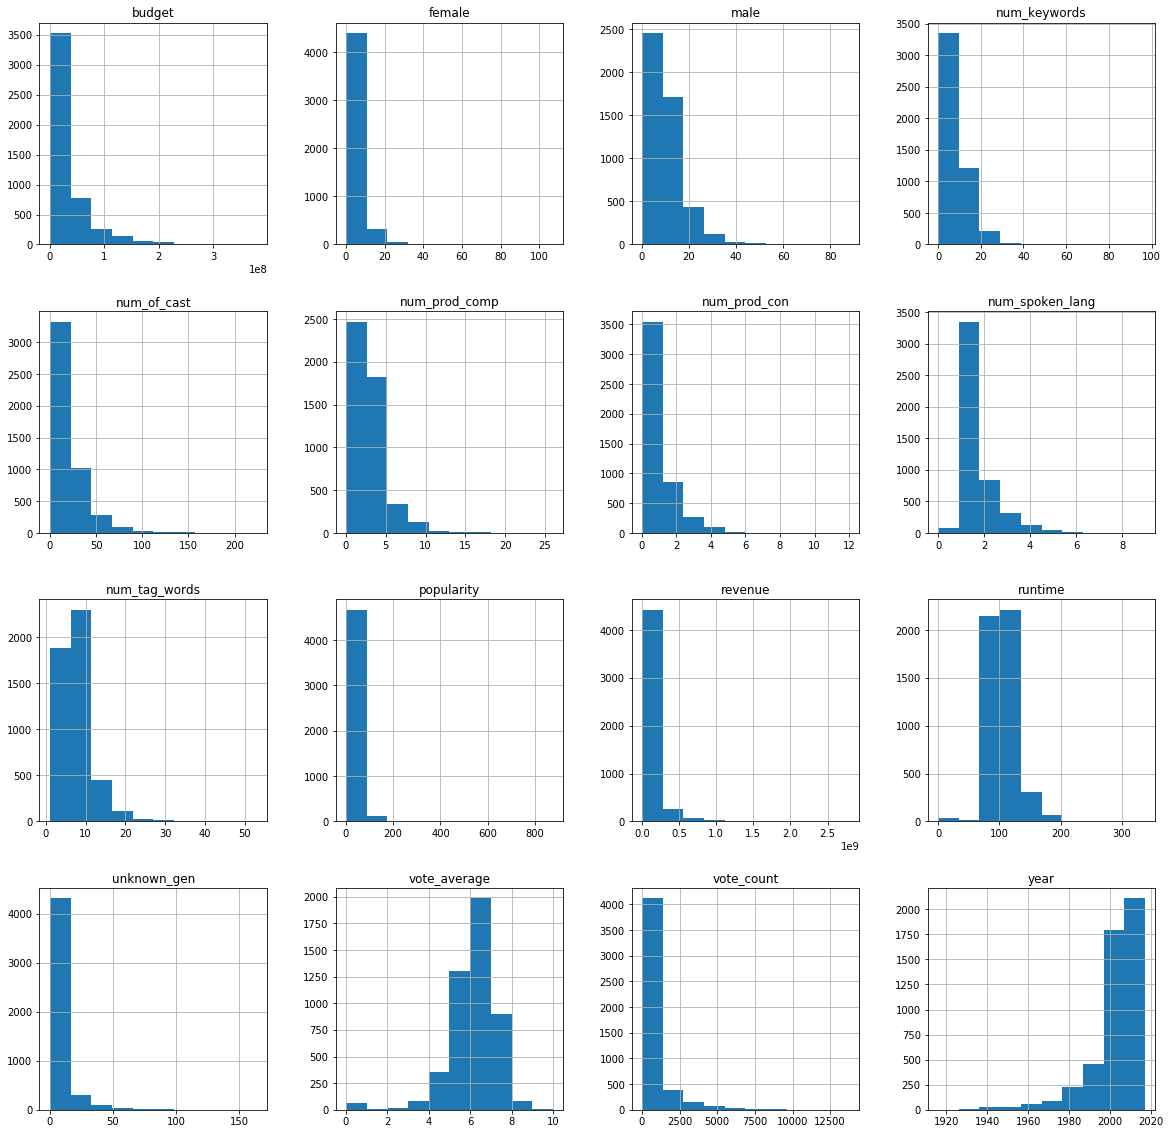

In [134]:
movie.hist(figsize=(20,20))

### Research Question 1:Which genres are most popular from year to year?

In [113]:
# get the number of movies in year
movie['year'].value_counts()

2009    246
2014    238
2006    235
2013    231
2008    227
       ... 
2017      1
1930      1
1934      1
1932      1
1916      1
Name: year, Length: 90, dtype: int64

<p>year 2009 is the largest year that have the most movies by 246 movie</p>

In [115]:
#getting the list of year
year=movie['year'].value_counts().index

In [116]:
#get important list in genres over year
#identify those lists
dic_year_genre={} #dictionary has each year with the genres and thier numbers for each year
max_genre_year=[] #the genre that is the most popular in every year
max_genre_year_value=[] # the number describe the repetation of every popular genre
g_year=[]  # the list of years

In [117]:
for y in year :
    dic_genre={}
    g_year.append(y)
    df_genre=movie.query('year==@y')
    indexs=df_genre.index
    for i in indexs:
        genre=df_genre['genre_list'][i]
        for j in range(len(genre)):
            if genre[j] in dic_genre:
                dic_genre[genre[j]]+=1
            else:
                dic_genre[genre[j]]=1
    max_genre_year.append(max(dic_genre,key=dic_genre.get))
    max_genre_year_value.append(dic_genre[max(dic_genre,key=dic_genre.get)])
    dic_year_genre[y]=dic_genre

In [119]:
genre_year=[g_year,max_genre_year,max_genre_year_value]
genre_year=np.array(genre_year)
genre_year=genre_year.transpose()

In [120]:
#creating dataframe contining the array made 
genre_year_df=pd.DataFrame(genre_year,columns=['year','max_genre_year','max_genre_year_value'])

In [126]:
genre_year_df.head()

,year,max_genre_year,max_genre_year_value
0,2009,Drama,121
1,2014,Drama,110
2,2006,Drama,132
3,2013,Drama,110
4,2008,Drama,106


## visualize the data in genre_year_df

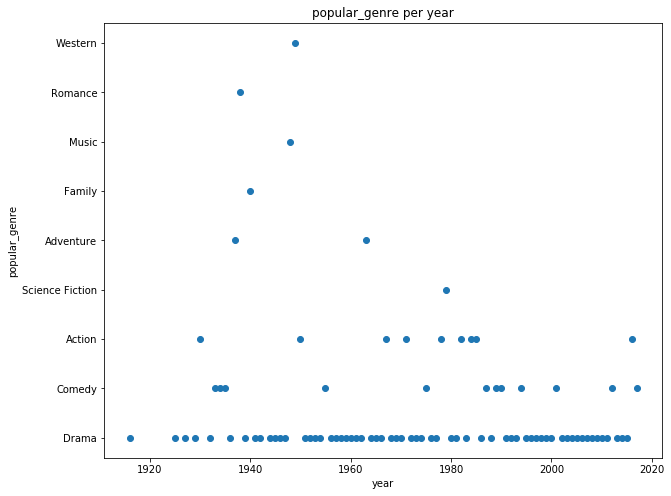

In [128]:
#plot the max_genre_year by year
plt.subplots(figsize=(10, 8))
plt.scatter(g_year,genre_year_df['max_genre_year'])
plt.title('popular_genre per year')
plt.xlabel('year')
plt.ylabel('popular_genre');

<h4>the previous plot shows that the most popular genre is the drame genre over the years</h4>

In [129]:
#getting the number of times a genre was the most popular
genres={}
for i in range(len(genre_year_df)):
    if genre_year_df['max_genre_year'][i] in genres:
        genres[genre_year_df['max_genre_year'][i]]+=1
    else:
         genres[genre_year_df['max_genre_year'][i]]=1

In [130]:
genres

{'Drama': 62,
 'Comedy': 12,
 'Action': 9,
 'Science Fiction': 1,
 'Adventure': 2,
 'Family': 1,
 'Music': 1,
 'Romance': 1,
 'Western': 1}

In [131]:
#the shape of genre_year_df
genre_year_df.shape

(90, 3)

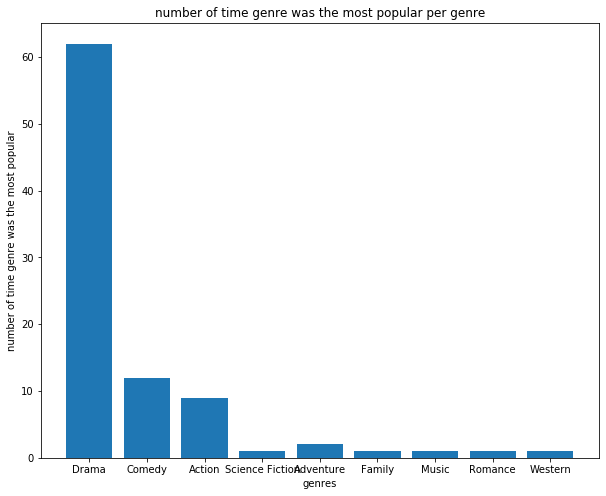

In [132]:
plt.subplots(figsize=(10, 8))
plt.bar(genres.keys(),genres.values())
plt.title('number of time genre was the most popular per genre')
plt.xlabel('genres')
plt.ylabel('number of time genre was the most popular');

<h6> shows that the drama genre was the most popular genre more than 60 time among 90 year</h6> 
<p>that mean that the precentage of drama genre was 66.67 %</p>

### Research Question 2:What kinds of properties are associated with movies that have high revenues?</h6>

<h5>visualize the amount of revenue per year</h5>

In [136]:
#get the sum of revenue every year
year_revenue=movie.groupby('year')['revenue'].sum()
year=year_revenue.index
amount_revenue=[year_revenue[year[i]] for i in range(len(year))]

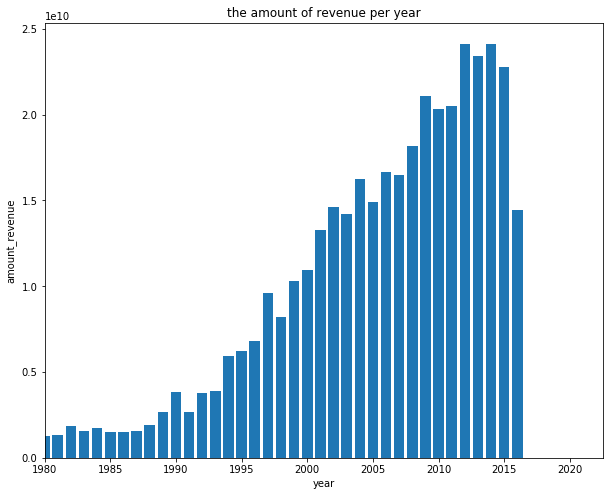

In [137]:
plt.subplots(figsize=(10, 8))
plt.bar(year,amount_revenue)
plt.title('the amount of revenue per year')
plt.xlim(1980)
plt.xlabel('year')
plt.ylabel('amount_revenue');

<h6>previous plot shows that the amount of revenue each year increase</h6>
<p>be aware that it may decrease a little in some years for some unknown reasons</p>

<h5>visualize the amount of vote_count per year</h5>

In [139]:
#vote_count per year
vote=movie.groupby('year')['vote_count'].sum()

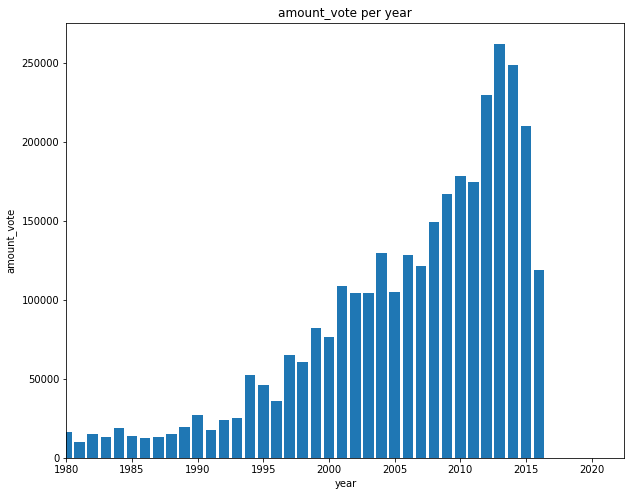

In [140]:
plt.subplots(figsize=(10, 8))
plt.bar(year,vote)
plt.title('amount_vote per year')
plt.xlim(1980)
plt.xlabel('year')
plt.ylabel('amount_vote');

#### it shows that the amount of vote over the years also incease  

### visualize the amount of vote and amount of revenue

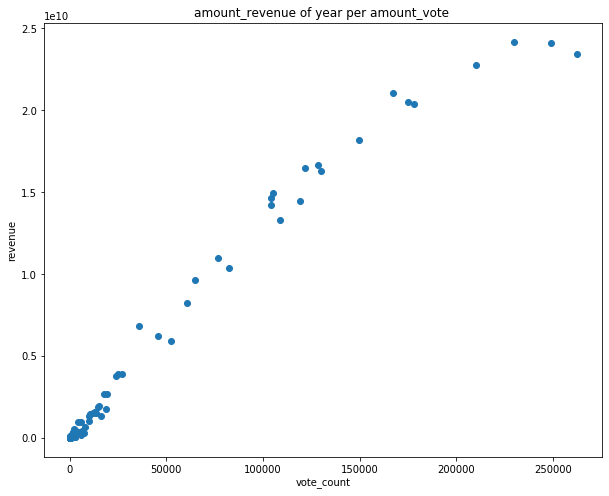

In [141]:
plt.subplots(figsize=(10, 8))
plt.scatter(vote,amount_revenue)
plt.title('amount_revenue of year per amount_vote ')
plt.ylabel('revenue')
plt.xlabel('vote_count');

#### it shows that may be the amount of revenue is affected by the amount of the vote
<p> that when the amount of vote increase per year it also make the revenue increase</p>

<h2>visualize the revenue per the vote average</h2>

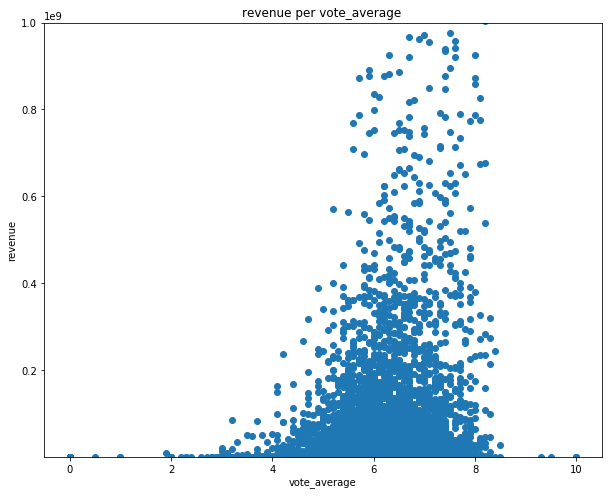

In [143]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['vote_average'],movie['revenue'])
plt.title('revenue per vote_average ')
plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('vote_average');

#### it shows that the vote_average doesn't affect the revenue 
<p>as it shows a high vote but with low revenue and low vote with high revenue</p>

### visualize the revenue per the num of tagline words

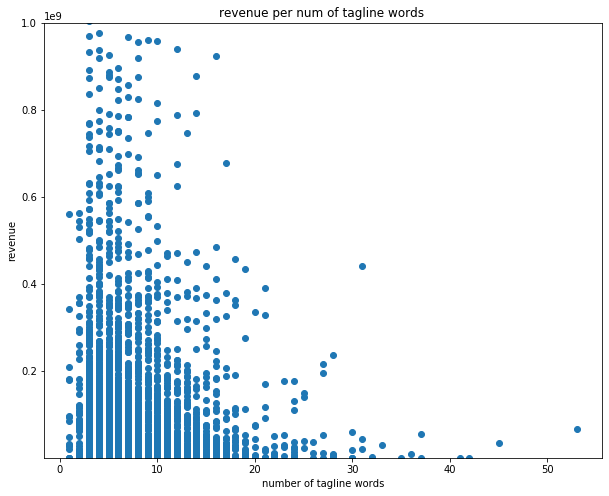

In [144]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_tag_words'],movie['revenue'])
plt.title('revenue per num of tagline words ')
plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('number of tagline words');

#### it shows that the higher the number of tagline words get the lower the revenue it gets

## visualize the revenue per popularity

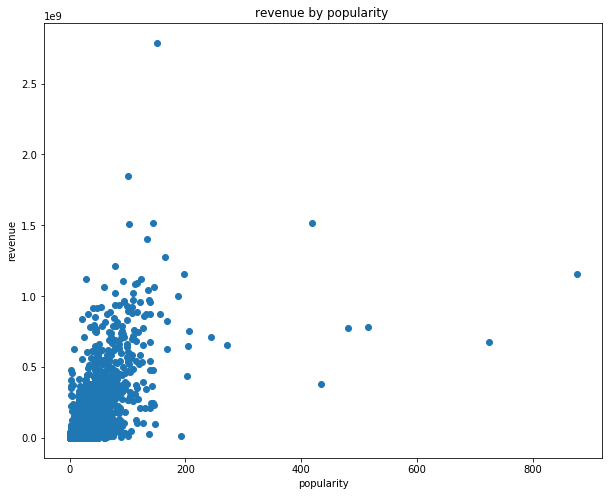

In [149]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['popularity'],movie['revenue'])
plt.title('revenue by popularity ')
plt.ylabel('revenue')
plt.xlabel('popularity');

#### it shows that popularity doen't affect the revenue

### visualize revenue per budget

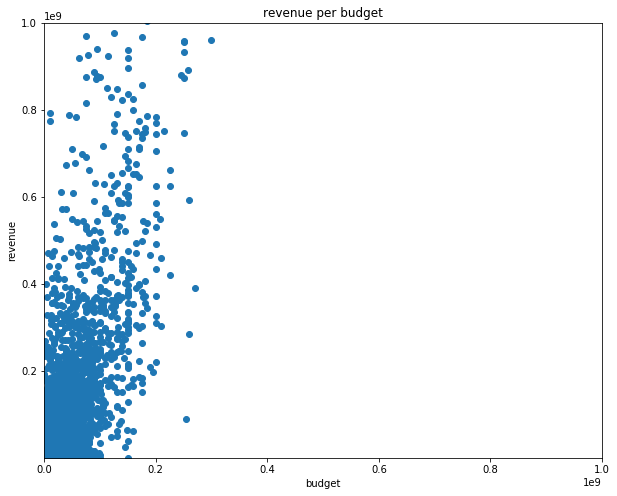

In [153]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['budget'],movie['revenue'])
plt.title('revenue per budget')
plt.ylim(10000,1000000000)
plt.xlim(0,1000000000)
plt.ylabel('revenue')
plt.xlabel('budget');

#### budet doen't affect the revenue

### visualize the revenue per the the num of key words

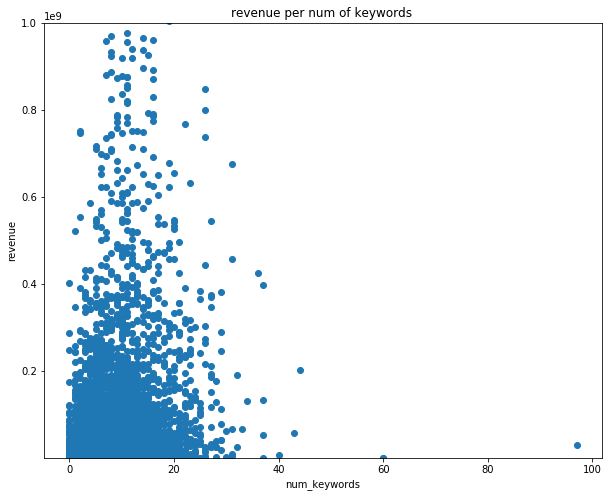

In [154]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_keywords'],movie['revenue'])
plt.title('revenue per num of keywords ')
plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_keywords');

#### the smaller the number of key words the larger the revenue

### visualize the revenue per the number of production companies 

In [155]:
#some important data
total_revenue=movie.groupby('num_prod_comp')['revenue'].sum()
num_prod_comp=total_revenue.index
num_comp_revenue=[total_revenue[num_prod_comp[i]] for i in range(len(num_prod_comp))]

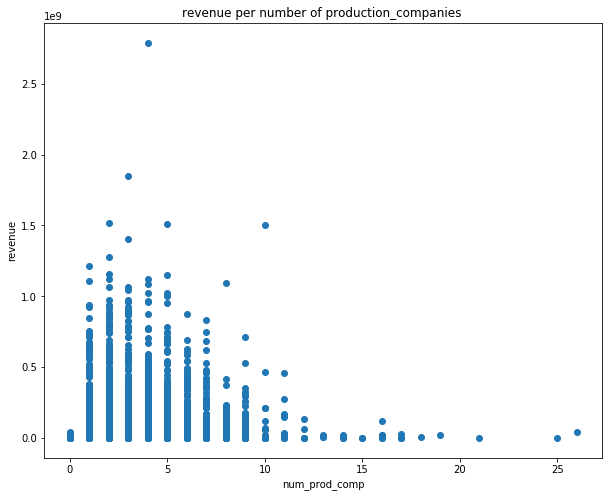

In [156]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_prod_comp'],movie['revenue'])
plt.title('revenue per number of production_companies ')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_prod_comp');

#### the larger the number of production companies the greater the revenue may decrease

### visualize the revenue per the number of countries

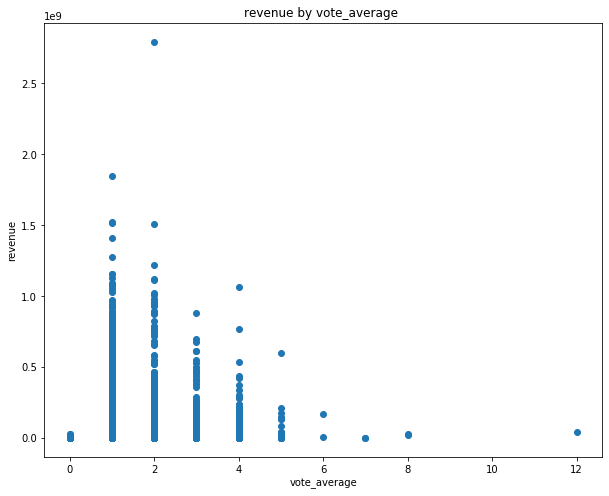

In [159]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_prod_con'],movie['revenue'])
plt.title('revenue by vote_average ')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('vote_average');

#### the larger the number of production countries the greater the revenue may decrease

### visualize the revenue per number of cast 

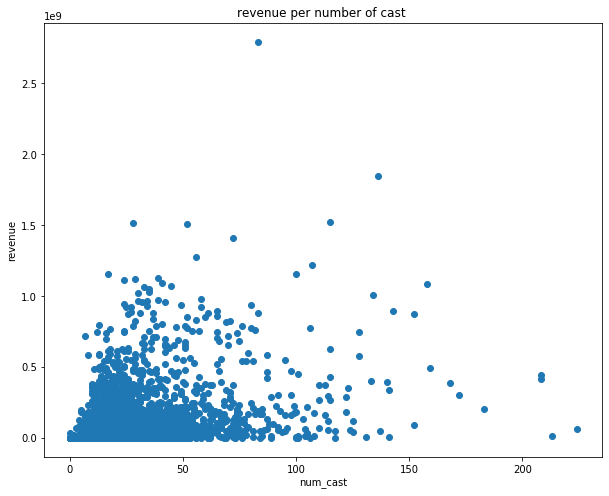

In [164]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_of_cast'],movie['revenue'])
plt.title('revenue per number of cast ')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_cast');

### visualize the revenue per number of female cast 

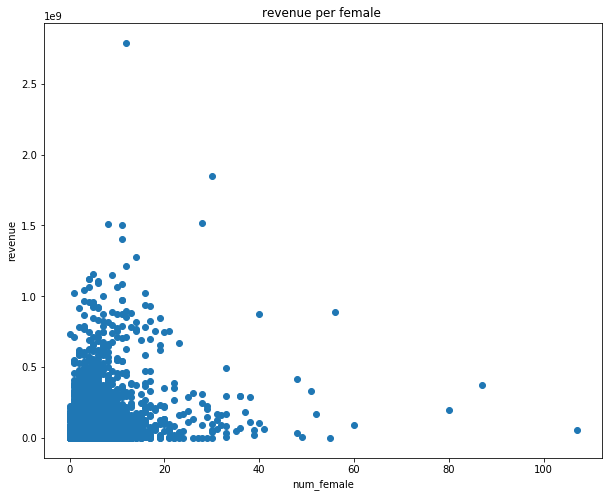

In [165]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['female'],movie['revenue'])
plt.title('revenue per female ')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_female');

### visualize the revenue per number of male cast 

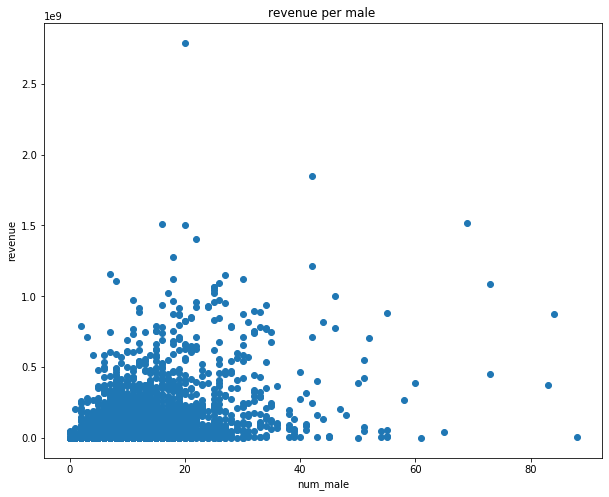

In [166]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['male'],movie['revenue'])
plt.title('revenue per male ')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_male');

#### the previous two plots show that the particition of female is important in any movie to raise the revenue

### visualize revenue per spoken_languages

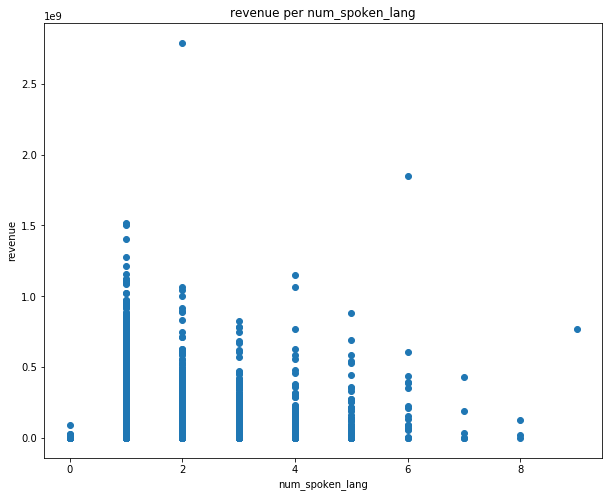

In [168]:
plt.subplots(figsize=(10, 8))
plt.scatter(movie['num_spoken_lang'],movie['revenue'])
plt.title('revenue per num_spoken_lang')
#plt.ylim(10000,1000000000)
plt.ylabel('revenue')
plt.xlabel('num_spoken_lang');

#### it shows that the movie better spoke one laguage

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Question1: Which genres are most popular from year to year?

##### we found that the most popular genre is drama genre 

### Question 2:What kinds of properties are associated with movies that have high revenues?

<p>i think that that the properties are <br>
[high vote_count,balanced(female,male) number of cast <br>
    smaller num_prod_con,smaller num_prod_comp,mean of num_tag_words,<br>
    better be a year which the total revenue be high ,better be one or maximum three num_spoken_lang
    <br>,genre_list beter be of drama genre]</p>

In [167]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 19 columns):
budget               4792 non-null int64
original_language    4792 non-null object
original_title       4792 non-null object
popularity           4792 non-null float64
revenue              4792 non-null int64
runtime              4792 non-null float64
vote_average         4792 non-null float64
vote_count           4792 non-null int64
num_of_cast          4792 non-null int64
female               4792 non-null int64
male                 4792 non-null int64
unknown_gen          4792 non-null int64
num_keywords         4792 non-null int64
num_spoken_lang      4792 non-null int64
num_prod_con         4792 non-null int64
num_prod_comp        4792 non-null int64
genre_list           4792 non-null object
num_tag_words        4792 non-null float64
year                 4792 non-null int64
dtypes: float64(4), int64(12), object(3)
memory usage: 711.4+ KB


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])